In [1]:
import sys
import os

source_path = 'C:/Users/User/Desktop/Dyslexia project/Source'

if source_path not in sys.path:
    sys.path.append(source_path)
    

import data_manipulation as dm 
import data_visualization as dv
import data_processing as dp

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the model 

In [3]:
model_name = 'gaussian_model'
dataset_name = ''
features = []
if model_name == 'rf_model':
    dataset_name = 'dysgraphic_people_samples_random_forest.xlsx'
    features = ['BHK_raw_quality_score**1 x median_Freq_speed**1', 'BHK_raw_quality_score**1 x Age**1', 'BHK_raw_speed_score**1 x mean_Pressure**1',
                 'median_Freq_speed**1 x bandwidth_tilt_x**1']
else: 
    dataset_name = 'dysgraphic_people_samples.xlsx'
    features = ['Space_Between_Words**1', 'BHK_raw_quality_score**1 x BHK_raw_speed_score**1', 'BHK_raw_quality_score**1 x median_Freq_speed**1', 
                'BHK_raw_quality_score**1 x Age**1']

In [4]:
import pickle 

In [5]:
# Open the pickle file in read binary mode
with open('C:/Users/User/Desktop/Dyslexia project/Models/'+model_name+'.pkl', 'rb') as file:
    # Load the saved model from the pickle file
    loaded_model = pickle.load(file)

# Close the file
file.close()

# Load the data

In [6]:
data = dm.read_data(dataset_name)
data

,ID,BHK_raw_quality_score,BHK_raw_speed_score,median_Freq_speed,Space_Between_Words,Age,Date
0,S0995,25.500000,207.000000,0.001744,1617.671646,9,2023-03-24
1,S0995,24.400000,206.950000,0.001692,1617.569187,9,2023-04-23
2,S0995,23.410000,206.905000,0.001645,1617.476974,9,2023-05-23
3,S0995,22.519000,206.864500,0.001602,1617.393983,9,2023-06-22
4,S0995,21.717100,206.828050,0.001564,1617.319290,9,2023-07-22
...,...,...,...,...,...,...,...
739,S1391,29.109344,67.000414,0.001576,1013.211245,9,2023-10-20
740,S1391,28.248410,66.450373,0.001562,1014.913318,9,2023-11-19
741,S1391,27.473569,65.955336,0.001550,1016.445184,9,2023-12-19
742,S1391,26.776212,65.509802,0.001538,1017.823864,9,2024-01-18


In [7]:
time_intervals = pd.date_range(start = '2023-03-24', end = '2024-02-17', periods = 12)
time_dict = {'Instant {}'.format(i): time_intervals[i] for i in range(12)}
data['Instant'] = data['Date'].map(lambda x: [k for k, v in time_dict.items() if v <= x][-1])
data

,ID,BHK_raw_quality_score,BHK_raw_speed_score,median_Freq_speed,Space_Between_Words,Age,Date,Instant
0,S0995,25.500000,207.000000,0.001744,1617.671646,9,2023-03-24,Instant 0
1,S0995,24.400000,206.950000,0.001692,1617.569187,9,2023-04-23,Instant 1
2,S0995,23.410000,206.905000,0.001645,1617.476974,9,2023-05-23,Instant 2
3,S0995,22.519000,206.864500,0.001602,1617.393983,9,2023-06-22,Instant 3
4,S0995,21.717100,206.828050,0.001564,1617.319290,9,2023-07-22,Instant 4
...,...,...,...,...,...,...,...,...
739,S1391,29.109344,67.000414,0.001576,1013.211245,9,2023-10-20,Instant 7
740,S1391,28.248410,66.450373,0.001562,1014.913318,9,2023-11-19,Instant 8
741,S1391,27.473569,65.955336,0.001550,1016.445184,9,2023-12-19,Instant 9
742,S1391,26.776212,65.509802,0.001538,1017.823864,9,2024-01-18,Instant 10


In [8]:
poly_data = dp.PolynomialFeatures_labeled(data.drop(['Date', 'ID', 'Instant'], axis = 1), 2)
poly_data.head()

,Constant Term,BHK_raw_quality_score**1,BHK_raw_speed_score**1,median_Freq_speed**1,Space_Between_Words**1,Age**1,BHK_raw_quality_score**2,BHK_raw_quality_score**1 x BHK_raw_speed_score**1,BHK_raw_quality_score**1 x median_Freq_speed**1,BHK_raw_quality_score**1 x Space_Between_Words**1,...,BHK_raw_speed_score**2,BHK_raw_speed_score**1 x median_Freq_speed**1,BHK_raw_speed_score**1 x Space_Between_Words**1,BHK_raw_speed_score**1 x Age**1,median_Freq_speed**2,median_Freq_speed**1 x Space_Between_Words**1,median_Freq_speed**1 x Age**1,Space_Between_Words**2,Space_Between_Words**1 x Age**1,Age**2
0,1.0,25.5000,207.00000,0.001744,1617.671646,9.0,650.250000,5278.500000,0.044469,41250.626973,...,42849.000000,0.360987,334858.030722,1863.00000,0.000003,2.821054,0.015695,2.616862e+06,14559.044814,81.0
1,1.0,24.4000,206.95000,0.001692,1617.569187,9.0,595.360000,5049.580000,0.041276,39468.688168,...,42828.302500,0.350085,334755.943291,1862.55000,0.000003,2.736343,0.015225,2.616530e+06,14558.122685,81.0
2,1.0,23.4100,206.90500,0.001645,1617.476974,9.0,548.028100,4843.646050,0.038500,37865.135968,...,42809.679025,0.340277,334664.073363,1862.14500,0.000003,2.660112,0.014801,2.616232e+06,14557.292769,81.0
3,1.0,22.5190,206.86450,0.001602,1617.393983,9.0,507.105361,4658.381675,0.036082,36422.095095,...,42792.921360,0.331454,334581.397524,1861.78050,0.000003,2.591512,0.014420,2.615963e+06,14556.545844,81.0
4,1.0,21.7171,206.82805,0.001564,1617.319290,9.0,471.632432,4491.705445,0.033969,35123.484757,...,42777.842267,0.323516,334506.995017,1861.45245,0.000002,2.529778,0.014078,2.615722e+06,14555.873612,81.0


In [9]:
samples = poly_data[features]
samples[['Date', 'ID']] = data[['Date', 'ID']]
samples.head()

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Space_Between_Words**1,BHK_raw_quality_score**1 x BHK_raw_speed_score**1,BHK_raw_quality_score**1 x median_Freq_speed**1,BHK_raw_quality_score**1 x Age**1,Date,ID
0,1617.671646,5278.500000,0.044469,229.5000,2023-03-24,S0995
1,1617.569187,5049.580000,0.041276,219.6000,2023-04-23,S0995
2,1617.476974,4843.646050,0.038500,210.6900,2023-05-23,S0995
3,1617.393983,4658.381675,0.036082,202.6710,2023-06-22,S0995
4,1617.319290,4491.705445,0.033969,195.4539,2023-07-22,S0995


In [10]:
dates = samples.Date.unique()

In [11]:
evolution_data = data.copy()

In [12]:
for id_ in data.ID.unique():
    predictions, probs = loaded_model.predict(samples[samples['ID'] == id_][features]), loaded_model.predict_proba(samples[samples['ID'] == id_][features])
    evolution_data.loc[evolution_data['ID'] == id_, 'Dysgraphia'] = predictions
    evolution_data.loc[evolution_data['ID'] == id_, 'Dysgraphia_Proba'] = probs[:, 1]

In [13]:
evolution_data[evolution_data['Instant'] == 'Instant 0']['Dysgraphia'].value_counts()

1.0    55
0.0     7
Name: Dysgraphia, dtype: int64

In [14]:
evolution_data.ID.unique()

array(['S0995', 'S0996', 'S0997', 'S1000', 'S1001', 'S1006', 'S1009',
       'S1010', 'S1013', 'S1017', 'S1019', 'S1020', 'S1022', 'S1023',
       'S1024', 'S1025', 'S1026', 'S1027', 'S1028', 'S1029', 'S1030',
       'S1031', 'S1032', 'S1033', 'S1034', 'S1035', 'S1036', 'S1209',
       'S1219', 'S1222', 'S1223', 'S1250', 'S1265', 'S1272', 'S1273',
       'S1292', 'S1294', 'S1301', 'S1309', 'S1314', 'S1341', 'S1344',
       'S1345', 'S1346', 'S1349', 'S1350', 'S1351', 'S1354', 'S1357',
       'S1358', 'S1360', 'S1362', 'S1363', 'S1364', 'S1365', 'S1369',
       'S1370', 'S1376', 'S1379', 'S1383', 'S1384', 'S1391'], dtype=object)

In [15]:
instant_0 = evolution_data[evolution_data['Instant'] == 'Instant 0']
mistaken_ids = list(instant_0[instant_0['Dysgraphia'] == 0]['ID'].values)

In [20]:
ids = evolution_data.ID.unique()
random_ids = list(np.random.choice(list(set(ids) - set(mistaken_ids)), size = 10, replace = False))

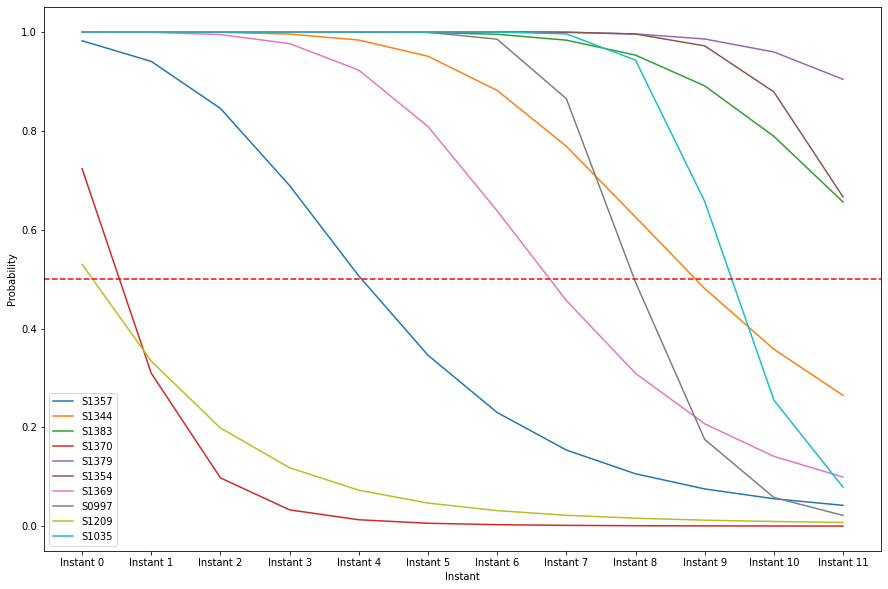

In [21]:
fig = plt.figure(figsize = (15, 10))

for id_ in list(random_ids):
    person = evolution_data[evolution_data['ID'] == id_]
    plt.plot(person['Instant'], person['Dysgraphia_Proba'], label = id_)
plt.xlabel('Instant')
plt.ylabel('Probability')
plt.axhline(y = 0.5, color='r', linestyle='--')
plt.legend()
plt.show()
fig.savefig('C:/Users/User/Desktop/Dyslexia project/Results/evolution.pdf')